


# <font color="#00bfff">1. Project overview</font>

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats. We're not kidding!

As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and engagement.


<br><font color="#00bfff">Data overview</font>

- `userid` - a unique number that identifies each player.
- `version` - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
- `sum_gamerounds` - the number of game rounds played by the player during the first week after installation
- `retention_1` - did the player come back and play 1 day after installing?
- `retention_7` - did the player come back and play 7 days after installing?


Dataset can be found on [Kaggle.](https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats/data)

# <font color="#00bfff">2. Experiment design</font>

This section outlines the structured methodology used to design and run the A/B test. The goal is to ensure that the results are statistically significant, unbiased, and directly address the core business question of whether moving the in-game gate from level 30 to level 40 impacts player behavior.



## <font color="#00bfff">2.1 Business Goal</font>

The primary business goal is to determine if moving the first mandatory stopping point (the "gate") from level 30 to level 40 improves overall player experience and value. The company wants to validate whether this change leads to higher player retention and deeper engagement in the first week after installation.



## <font color="#00bfff">2.2 The Underlying Hypothesis</font>

The business is operating on a key assumption: encountering a progression gate too early in the game might be a frustrating experience that causes players to quit.

By moving the gate to a later level (40), the hypothesis is that:

- Players will have more time to enjoy the core gameplay loop without interruption.
- This enhanced early experience will make them more invested and committed to the game.
- As a result, a higher percentage of players will return to play on subsequent days, and they will play more game rounds in total.


  
## <font color="#00bfff">2.3 Key Performance Indicators (KPIs)</font>

To measure the success of this change, the business will focus on two specific areas:

- **Player Retention**: This is the most critical metric for the long-term health of a free-to-play game. It answers the question, "Are players coming back?"
  - `retention_1`: Measures short-term retention (1 day after install).
  - `retention_7`: Measures medium-term retention (7 days after install), which is often a strong indicator of a player's long-term value.
- **Player Engagement**: This metric measures how much a player is interacting with the game. It answers the question, "How much are players playing?"
  - `sum_gamerounds`: The total number of rounds played in the first week provides a clear signal of how captivated a player is by the game.



## <font color="#00bfff">2.4 Primary metric</font>

 When we have multiple metrics, we risk a situation where one metric goes up, another goes down, and we don't know how to make a decision. To avoid this, we must decide on a **single Primary Metric** (also called a "North Star" metric) before the experiment begins. This is the metric that will ultimately determine if the test is a success or failure. The other metrics become **Secondary Metrics**, which provide valuable context but do not drive the final "Go/No-Go" decision.

- **Primary Metric**: `retention_7`. This is the single metric that will determine the success or failure of the experiment
- **Secondary Metrics**: `retention_1` and `sum_gamerounds`. These will be analyzed to understand the full impact of the change on user behavior.



## <font color="#00bfff">2.5 Hypotheses</font>

For each key metric, a null and alternative hypothesis were formulated to be tested.

<font color="#00bfff">Primary Metric: 7-Day Retention</font>

* **Null Hypothesis ($H_0$)**: There is **no difference** in the 7-day retention rate between the `gate_30` (control) and `gate_40` (test) groups.
    * $H_0: p_{40} = p_{30}$
* **Alternative Hypothesis ($H_a$)**: There is a **difference** in the 7-day retention rate between the two groups.
    * $H_a: p_{40} \ne p_{30}$

*(where $p$ represents the proportion of users retained after 7 days)*


<font color="#00bfff">Secondary Metric: 1-Day Retention</font>

* **Null Hypothesis ($H_0$)**: There is no difference in the 1-day retention rate between the `gate_30` and `gate_40` groups.
    * $H_0: p_{40} = p_{30}$
* **Alternative Hypothesis ($H_a$)**: There is a difference in the 1-day retention rate between the two groups.
    * $H_a: p_{40} \ne p_{30}$

*(where $p$ represents the proportion of users retained after 1 day)*

<font color="#00bfff">Secondary Metric: Sum of Game Rounds</font>

* **Null Hypothesis ($H_0$)**: The distribution of game rounds played in the first week is the same for both the `gate_30` and `gate_40` groups.
    * $H_0: \text{Distribution}_{40} = \text{Distribution}_{30}$
* **Alternative Hypothesis ($H_a$)**: The distribution of game rounds played in the first week is different between the two groups.
    * $H_a: \text{Distribution}_{40} \ne \text{Distribution}_{30}$
  
<br>

One would be tempted to compare mean values of `sum_gamerounds` between groups as a basis of hypothesis. But decision of comparing distributions come from a nature of the data. A hypothesis about the mean would imply using an Independent Samples t-test. This would be problematic because:
- **It Violates Assumptions**: The t-test assumes that the data is approximately normally distributed. But, player engagement data almost always has extreme outliers (e.g., a few players who play thousands of rounds, while most play less than 50). The mean is extremely sensitive to these outliers and can give a misleading picture of the "typical" player. This makes the results of a t-test unreliable.

- **It Can Be Misleading**: A statistically significant difference in the mean could be caused by a handful of extreme users in one group, not by a general change in behavior for the majority of players.




## <font color="#00bfff">2.6 The Business Decision</font>

Based on the pre-specified KPIs, the company will make the following decision:

- **Rollout**: If the `gate_40` group shows a statistically significant and practically meaningful improvement in the primary metric (7-day retention), the change will be rolled out to all new players.

- **No rollout**: If the `gate_40` group shows no improvement or a statistically significant decline in 7-day retention, the company will keep the current `gate_30` design.

- **Re-evaluate**: If results are inconclusive (e.g., not statistically significant but directionally favorable), the company may collect additional data or rerun the experiment before making a final rollout decision.

Secondary metrics (1-day retention and game rounds) will be used to provide supporting evidence and context but will not override the decision based on the primary metric.




## <font color="#00bfff">2.7 Experiment Parameters</font>

The following standard statistical parameters are set prior to launching the experiment to ensure the results are robust.

* **Significance Level ($\alpha$)**: **0.01**. This means we accept a 1% risk of committing a Type I error (a false positive).
* **Statistical Power ($1-\beta$)**: **0.90**. This provides an 90% chance of detecting a true effect if one exists (avoiding a Type II error).
* **Minimum Detectable Effect (MDE)**: A **1%** absolute increase in 7-day retention. This is the smallest improvement considered meaningful enough to justify the change.




## <font color="#00bfff">2.8 Sample Size and Duration</font>

A power analysis was conducted to determine the necessary sample size to achieve the desired statistical power and significance.

* **Required Sample Size**: Approximately **43,000** users per group (~86,000 in total).
* **Estimated Duration**: The test was planned to run for approximately **18 days** to collect the required number of new users.


In [1]:
import numpy as np
from scipy import stats

def calculate_sample_size_proportions(baseline_rate, absolute_mde, alpha=0.05, power=0.8, two_tailed=True):
    """Calculates the required sample size per group for a two-sample proportions test.

    Args:
        baseline_rate (float): The conversion rate of the control group (between 0 and 1).
        absolute_mde (float): The absolute minimum detectable effect (e.g., 0.02 for a 2 percentage point lift).
        alpha (float, optional): The significance level (Type I error rate). Defaults to 0.05.
        power (float, optional): The statistical power (1 - Type II error rate). Defaults to 0.8.
        two_tailed (bool, optional): Whether the test is two-tailed or one-tailed. Defaults to True.

    Returns:
        int: The required sample size for each group.

    Raises:
        ValueError: If baseline_rate or baseline_rate + absolute_mde are not valid probabilities.
    """
    # --- Input Validation ---
    if not (0 < baseline_rate < 1):
        raise ValueError("baseline_rate must be in (0, 1).")
    if absolute_mde <= 0:
        raise ValueError("absolute_mde must be > 0.")
    p1 = baseline_rate
    p2 = p1 + absolute_mde
    if not (0 < p2 < 1):
        raise ValueError("baseline_rate + absolute_mde must be in (0, 1).")

    # --- Z-scores ---
    z_alpha = stats.norm.ppf(1 - alpha / 2) if two_tailed else stats.norm.ppf(1 - alpha)
    z_beta = stats.norm.ppf(power)

    # --- Standard Errors ---
    p_bar = 0.5 * (p1 + p2)
    se_H0 = np.sqrt(2 * p_bar * (1 - p_bar))      # Pooled standard error under H0
    se_H1 = np.sqrt(p1 * (1 - p1) + p2 * (1 - p2))  # Unpooled standard error under H1

    # --- Sample Size Calculation ---
    n = ((z_alpha * se_H0 + z_beta * se_H1) ** 2) / (absolute_mde ** 2)
    return int(np.ceil(n))


def sample_size_analysis(baseline_rate, mde_values, alpha=0.05, power=0.8):
    """Prints a table showing sample sizes for different MDEs.

    Args:
        baseline_rate (float): The conversion rate of the control group.
        mde_values (list[float]): A list of absolute MDEs to analyze.
        alpha (float, optional): The significance level. Defaults to 0.05.
        power (float, optional): The statistical power. Defaults to 0.8.
    """
    print("Sample Size Analysis")
    print(f"Baseline Rate: {baseline_rate:.1%} | Alpha: {alpha} | Power: {power}")
    print("-" * 80)
    print(f"{'MDE (abs)':<12} {'MDE (rel)':<12} {'n per group (2-tail)':<22} "
          f"{'n per group (1-tail)':<22} {'Total n (2-tail)':<15}")
    print("-" * 80)

    for mde in mde_values:
        try:
            rel = mde / baseline_rate
            n_two = calculate_sample_size_proportions(baseline_rate, mde, alpha, power, two_tailed=True)
            n_one = calculate_sample_size_proportions(baseline_rate, mde, alpha, power, two_tailed=False)
            total_n_two = n_two * 2
            print(f"{mde:0.003f}      {rel:<11.1%} {n_two:<22,} "
                  f"{n_one:<22,} {total_n_two:<15,}")
        except ValueError as e:
            print(f"{mde:0.003f}      -            - (Error: {e})")

In [2]:
alpha = 0.01
power = 0.90
baseline_rate = 0.17
mde_values = [0.005, 0.01, 0.02, 0.03]

sample_size_analysis(baseline_rate = baseline_rate, 
                     mde_values = mde_values,
                     alpha = alpha,
                     power = power)

Sample Size Analysis
Baseline Rate: 17.0% | Alpha: 0.01 | Power: 0.9
--------------------------------------------------------------------------------
MDE (abs)    MDE (rel)    n per group (2-tail)   n per group (1-tail)   Total n (2-tail)
--------------------------------------------------------------------------------
0.005      2.9%        169,913                148,645                339,826        
0.010      5.9%        42,962                 37,585                 85,924         
0.020      11.8%       10,979                 9,605                  21,958         
0.030      17.6%       4,983                  4,360                  9,966          



## <font color="#00bfff">2.9 Target Population</font>

The experiment was targeted at a specific segment of the player base to ensure clean and relevant data.

* **Participants**: All **new players** who installed the game during the experiment period.
* **Platforms**: iOS and Android.
* **Regions**: Global.

## <font color="#00bfff">2.10 Statistical Test Selection</font>

The choice of statistical test was based on the data type and distribution of each metric.

* **Retention Metrics (`retention_1`, `retention_7`)**: A **Chi-Squared Test of Independence** was selected. This test is appropriate for comparing two proportions from independent groups (i.e., the proportion of retained users in the control group vs. the treatment group).
  * **Why it's right**: We are comparing the proportions of a categorical outcome (retained vs. not retained) across two independent groups (control vs. treatment). The Chi-Squared test is designed for precisely this scenario, checking if there's a statistically significant association between the group and the retention outcome.

* **Engagement Metric (`sum_gamerounds`)**: A **Mann-Whitney U Test** was selected. As player engagement data is typically heavily skewed and not normally distributed, this non-parametric test provides a robust way to compare the two groups' distributions without assuming normality.
  * Mann-Whitney U test is essentially the formal statistical test for a difference in medians.
  * **Why it's right**: We correctly identified that engagement data like sum_gamerounds is almost always heavily skewed, not following a normal distribution. Using a standard t-test would violate its core assumptions and could lead to incorrect conclusions. The Mann-Whitney U test is a non-parametric alternative that doesn't assume a normal distribution. It compares the ranks of the values in each group, making it robust to outliers and skewness.

# <font color="#00bfff">3. Data Cleaning and Exploratory Data Analysis (EDA)</font>

## <font color="#00bfff">3.1 Import libraries</font>

In [3]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chi-square
from scipy.stats import chi2_contingency
# Mann-Whitney
from scipy.stats import mannwhitneyu

In [4]:
import os
# Settings for visualizations

style_path = 'styles/custom.mplstyle'

# Check if the file exists at that path and apply the style
if os.path.exists(style_path):
    plt.style.use(style_path)
    print(f"Using custom style from '{style_path}'")
else:
    plt.style.use('ggplot')
    print(f"Custom style not found at '{style_path}'. Using ggplot style instead.")


# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

BLUE, PURPLE, GREEN, PINK, RED, YELLOW, GRAY = ["#3F7AD8", "#6432C6", "#13BF81", "#B715B7", "#DD405B", "#F7CB52", "#44546A"]

Using custom style from 'styles/custom.mplstyle'


## <font color="#00bfff">3.2 Load data & Initial exploration</font>

In [5]:
df = pl.read_csv("data/cookie_cats.csv")

In [6]:
# Check for shape of the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 90189 rows and 5 columns.


In [7]:
df.glimpse

<bound method DataFrame.glimpse of shape: (90_189, 5)
┌─────────┬─────────┬────────────────┬─────────────┬─────────────┐
│ userid  ┆ version ┆ sum_gamerounds ┆ retention_1 ┆ retention_7 │
│ ---     ┆ ---     ┆ ---            ┆ ---         ┆ ---         │
│ i64     ┆ str     ┆ i64            ┆ bool        ┆ bool        │
╞═════════╪═════════╪════════════════╪═════════════╪═════════════╡
│ 116     ┆ gate_30 ┆ 3              ┆ false       ┆ false       │
│ 337     ┆ gate_30 ┆ 38             ┆ true        ┆ false       │
│ 377     ┆ gate_40 ┆ 165            ┆ true        ┆ false       │
│ 483     ┆ gate_40 ┆ 1              ┆ false       ┆ false       │
│ 488     ┆ gate_40 ┆ 179            ┆ true        ┆ true        │
│ …       ┆ …       ┆ …              ┆ …           ┆ …           │
│ 9999441 ┆ gate_40 ┆ 97             ┆ true        ┆ false       │
│ 9999479 ┆ gate_40 ┆ 30             ┆ false       ┆ false       │
│ 9999710 ┆ gate_30 ┆ 28             ┆ true        ┆ false       │
│ 999976

In [8]:
# Check for dtypes
df.schema

Schema([('userid', Int64),
        ('version', String),
        ('sum_gamerounds', Int64),
        ('retention_1', Boolean),
        ('retention_7', Boolean)])

In [9]:
df.describe()

statistic,userid,version,sum_gamerounds,retention_1,retention_7
str,f64,str,f64,f64,f64
"""count""",90189.0,"""90189""",90189.0,90189.0,90189.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0
"""mean""",4.9984e6,null,51.872457,0.44521,0.186065
"""std""",2.8833e6,null,195.050858,null,null
"""min""",116.0,"""gate_30""",0.0,0.0,0.0
"""25%""",2.51223e6,null,5.0,null,null
"""50%""",4.995815e6,null,16.0,null,null
"""75%""",7.496452e6,null,51.0,null,null
"""max""",9.999861e6,"""gate_40""",49854.0,1.0,1.0


In [10]:
# Check for duplicates
df["userid"].is_duplicated().sum()

0

In [11]:
# Check if number of unique users matches with the row count
df["userid"].n_unique()

90189

## <font color="#00bfff">3.3 Data cleaning</font>

- A significant outlier was detected: a single user credited with approximately 50,000 game rounds. This level of activity is highly improbable for a human player, suggesting it is likely a data error, a test account, or bot activity. Therefore, to prevent this anomalous data from skewing the analysis, this user has been excluded from the dataset.
- `version` column datatype changed from String to Categorical.

In [12]:
def clean_df(df):
    """
    Cleans the Cookie Cats DataFrame by removing the main outlier
    and casting the version column to a categorical type.
    """
    return (
        df.filter(
            pl.col("sum_gamerounds") < pl.col("sum_gamerounds").max()
        )
        .with_columns(
            pl.col("version").cast(pl.Categorical)
        )
    )

In [13]:
df_cleaned = clean_df(df)

## <font color="#00bfff">3.4 EDA</font>

In [14]:
df_cleaned.describe()

statistic,userid,version,sum_gamerounds,retention_1,retention_7
str,f64,str,f64,f64,f64
"""count""",90188.0,"""90188""",90188.0,90188.0,90188.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0
"""mean""",4.9984e6,null,51.320253,0.445214,0.186056
"""std""",2.8833e6,null,102.682719,null,null
"""min""",116.0,null,0.0,0.0,0.0
"""25%""",2.51223e6,null,5.0,null,null
"""50%""",4.995815e6,null,16.0,null,null
"""75%""",7.496452e6,null,51.0,null,null
"""max""",9.999861e6,null,2961.0,1.0,1.0


In [15]:
# Create a new dataframe with summary statistics for each version
q = (
    df_cleaned.lazy()
    .group_by("version")
    .agg(
        pl.len().alias("n_observations"),
        pl.col("sum_gamerounds").mean().alias("mean_sum_gamerounds"),
        pl.col("sum_gamerounds").median().alias("median_sum_gamerounds"),
        pl.col("retention_1").mean().alias("retention_1_proportion"),
        pl.col("retention_7").mean().alias("retention_7_proportion")
    )
    .sort(by="version")
)

versions_df = q.collect()
versions_df

version,n_observations,mean_sum_gamerounds,median_sum_gamerounds,retention_1_proportion,retention_7_proportion
cat,u32,f64,f64,f64,f64
"""gate_30""",44699,51.342111,17.0,0.448198,0.190183
"""gate_40""",45489,51.298776,16.0,0.442283,0.182


In [16]:
gate_30_percent_observations = versions_df.select(
    (pl.col("n_observations").filter(pl.col("version") == "gate_30")) / pl.col("n_observations").sum()
).item()

gate_40_percent_observations = 1 - gate_30_percent_observations

print(f"gate_30 observations: {gate_30_percent_observations*100:.2f}%")
print(f"gate_40 observations: {gate_40_percent_observations*100:.2f}%")

gate_30 observations: 49.56%
gate_40 observations: 50.44%


### <font color="#00bfff">Users with 0 gamerounds</font>

In [17]:
# Check for users with 0 gamerounds
df_cleaned.filter(pl.col("sum_gamerounds") ==0)

userid,version,sum_gamerounds,retention_1,retention_7
i64,cat,i64,bool,bool
1066,"""gate_30""",0,false,false
2101,"""gate_30""",0,false,false
3095,"""gate_30""",0,false,false
4076,"""gate_40""",0,false,false
4176,"""gate_30""",0,false,false
…,…,…,…,…
9986185,"""gate_30""",0,false,false
9988600,"""gate_40""",0,false,false
9990773,"""gate_30""",0,false,false


**Analyze Players with Zero Game Rounds**

Should we remove users who installed the game but played 0 rounds.

**The Answer: No, we should not remove them.**

Reasoning: These users represent a real and important outcome: **immediate churn**. They were correctly assigned to a group, experienced the game (or didn't), and decided not to play. Their behavior is a valid data point.

Removing them would introduce **selection bias**. We would be artificially inflating our retention and engagement metrics by only analyzing the users who were engaged enough to play at least one round. The goal of the A/B test is to measure the impact on all new users, including those who churn immediately.

### <font color="#00bfff">Distribution analysis of sum_gamerounds</font>

In [18]:
df_cleaned.select(
    pl.col("sum_gamerounds").quantile(0.10).alias("q_10"),
    pl.col("sum_gamerounds").quantile(0.25).alias("q_25"),
    pl.col("sum_gamerounds").quantile(0.5).alias("q_50"),
    pl.col("sum_gamerounds").quantile(0.75).alias("q_75"),
    pl.col("sum_gamerounds").quantile(0.85).alias("q_85"),
    pl.col("sum_gamerounds").quantile(0.90).alias("q_90"),
    pl.col("sum_gamerounds").quantile(0.99).alias("q_99"),
)

q_10,q_25,q_50,q_75,q_85,q_90,q_99
f64,f64,f64,f64,f64,f64,f64
1.0,5.0,16.0,51.0,92.0,134.0,493.0


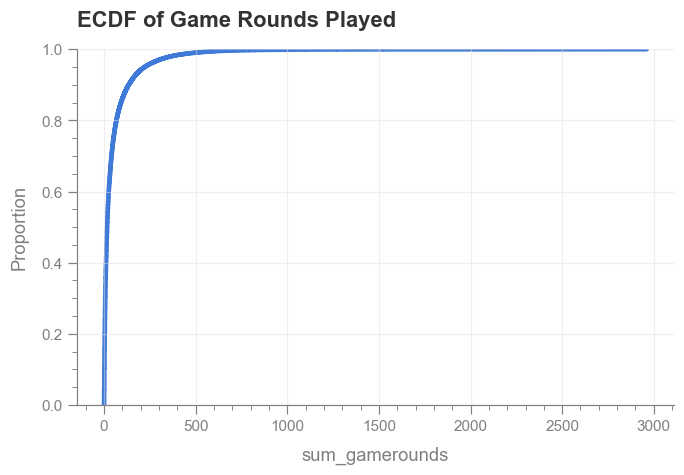

In [19]:
# Empirical Cumulative Distribution Function
sns.ecdfplot(data=df_cleaned, x="sum_gamerounds")
plt.title("ECDF of Game Rounds Played")
plt.grid(True)
plt.show()

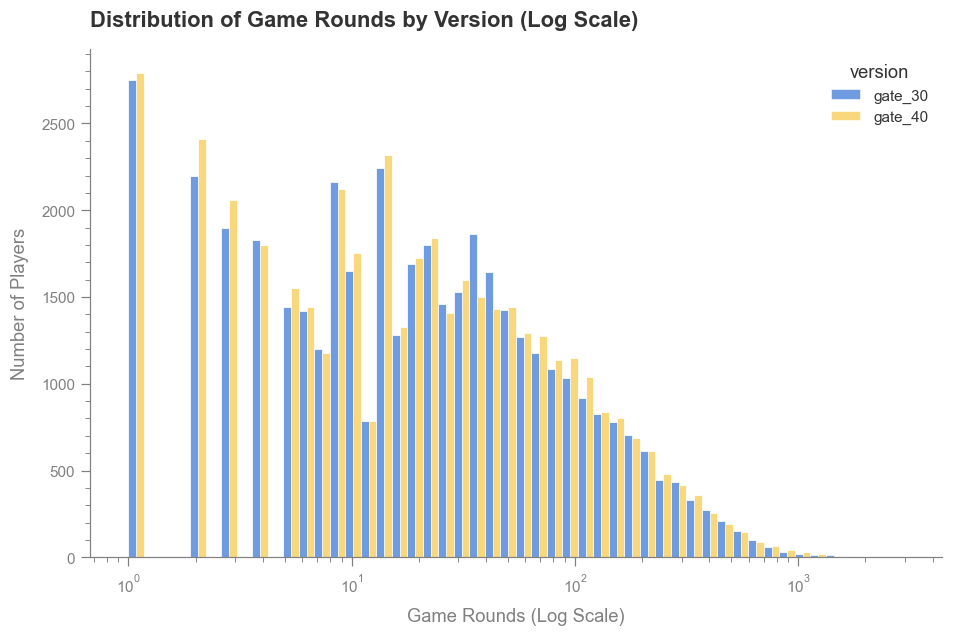

In [20]:
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability

sns.histplot(
    data=df_cleaned, 
    x="sum_gamerounds", 
    hue="version",      # Creates separate histograms for each version
    log_scale=True,     # Uses a logarithmic scale on the x-axis
    bins=50,            # Adjust number of bins as needed
    common_bins=True,   # Ensures both histograms share the same bin edges
    palette={"gate_30": BLUE, "gate_40": YELLOW}, # Custom colors
    multiple="dodge",  # This is the key change
)

plt.title("Distribution of Game Rounds by Version (Log Scale)")
plt.xlabel("Game Rounds (Log Scale)")
plt.ylabel("Number of Players")
plt.show()

## <font color="#00bfff">3.5 EDA Summary and Insights</font>
The initial exploration of the dataset reveals several key characteristics about the experiment and player behavior.

**1. Sample Size and Group Balance**✅

After cleaning, the dataset contains **90,188** unique players who participated in the A/B test. The two groups are well-balanced and of a sufficient size for robust analysis:
- `gate_30` (**Control**): 44,699 users (~49.6%)
- `gate_40` (**Treatment**): 45,489 users (~50.4%)

This near 50/50 split indicates that the randomization process was successful and there is no significant sample ratio mismatch, giving us confidence in the experiment's design.

<br>**2. Retention Proportions (Initial Observations)** 📉

A preliminary look at the retention rates - the key performance indicators - suggests that moving the gate to level 40 may have had a negative impact.

- **1-Day Retention**: The `gate_40` group shows a small drop in retention (**44.2%**) compared to the `gate_30` control group (**44.8%**).

- **7-Day Retention**: The drop is more pronounced for 7-day retention, with the `gate_40` group at **18.2%** compared to **19.0%** for the control group.

These raw numbers suggest the change was not successful, but formal hypothesis testing is required to determine if this difference is statistically significant or simply due to random chance.

<br>**3. Player Engagement Distribution** 📊

The distribution of `sum_gamerounds` is **heavily right-skewed**, which is typical for player engagement metrics.

- The mean number of rounds played is high (around **52**) and is heavily influenced by a small number of extremely active players.

- The median number of rounds played is much lower (around **17**), providing a more accurate representation of the typical player.

This skewness confirms that comparing medians or distributions (using the **Mann-Whitney U test**) is the correct approach, as a comparison of means would be misleading. The initial plots show that the overall engagement distribution is very similar between the two groups.

# <font color="#00bfff">4. Statistical analysis</font>

In the Statistical Analysis section, we'll formally test the hypotheses we defined in our Experiment Design. This involves running the chosen statistical tests on our cleaned data and reporting the raw statistical outputs, like the p-value.

## <font color="#00bfff">4.1 Retention analysis (Chi-Squared Test)</font>

Goal: To determine if the observed differences in 1-day and 7-day retention rates are statistically significant.

### <font color="#00bfff">7-day Retention analysis (Primary metric)</font>

* **Null Hypothesis ($H_0$)**: There is **no difference** in the 7-day retention rate between the `gate_30` (control) and `gate_40` (test) groups.
    * $H_0: p_{40} = p_{30}$
* **Alternative Hypothesis ($H_a$)**: There is a **difference** in the 7-day retention rate between the two groups.
    * $H_a: p_{40} \ne p_{30}$

*(where $p$ represents the proportion of users retained after 7 days)*


In [21]:
# Calculate the contingency table (distribution of true and false for each version)
contingency_7 = (
    df_cleaned
    .group_by("version", "retention_7")
    .len()
    .pivot(
        index = "version",
        on = "retention_7", # The values of retention_7 (true / false) become the columns
        values = "len"
    )
)

print(contingency_7)

shape: (2, 3)
┌─────────┬──────┬───────┐
│ version ┆ true ┆ false │
│ ---     ┆ ---  ┆ ---   │
│ cat     ┆ u32  ┆ u32   │
╞═════════╪══════╪═══════╡
│ gate_40 ┆ 8279 ┆ 37210 │
│ gate_30 ┆ 8501 ┆ 36198 │
└─────────┴──────┴───────┘


In [22]:
contingency_7_array = contingency_7.select(pl.all().exclude("version")).to_numpy()
contingency_7_array

array([[ 8279, 37210],
       [ 8501, 36198]], dtype=uint32)

In [23]:
chi2_stat_7, p_value_7, _, _ = chi2_contingency(contingency_7_array)

print(f"\nP-value for 7-Day Retention: {p_value_7:.4f}")


P-value for 7-Day Retention: 0.0016


### <font color="#00bfff">1-day Retention analysis (Secondary metric)</font>

* **Null Hypothesis ($H_0$)**: There is no difference in the 1-day retention rate between the `gate_30` and `gate_40` groups.
    * $H_0: p_{40} = p_{30}$
* **Alternative Hypothesis ($H_a$)**: There is a difference in the 1-day retention rate between the two groups.
    * $H_a: p_{40} \ne p_{30}$

*(where $p$ represents the proportion of users retained after 1 day)*

In [24]:
# Calculate the contingency table (distribution of true and false for each version)
contingency_1 = (
    df_cleaned
    .group_by("version", "retention_1")
    .len()
    .pivot(
        index = "version",
        on = "retention_1", # The values of retention_1 (true / false) become the columns
        values = "len"
    )
)

print(contingency_1)

shape: (2, 3)
┌─────────┬───────┬───────┐
│ version ┆ true  ┆ false │
│ ---     ┆ ---   ┆ ---   │
│ cat     ┆ u32   ┆ u32   │
╞═════════╪═══════╪═══════╡
│ gate_30 ┆ 20034 ┆ 24665 │
│ gate_40 ┆ 20119 ┆ 25370 │
└─────────┴───────┴───────┘


In [25]:
contingency_1_array = contingency_1.select(pl.all().exclude("version")).to_numpy()
chi2_stat_1, p_value_1, _, _ = chi2_contingency(contingency_1_array)

print(f"\nP-value for 1-Day Retention: {p_value_1:.4f}")


P-value for 1-Day Retention: 0.0750


## <font color="#00bfff">4.2 Engagement Analysis (Mann-Whitney U Test)</font>

### <font color="#00bfff">Total game rounds analysis (Secondary metric)</font>

* **Null Hypothesis ($H_0$)**: The distribution of game rounds played in the first week is the same for both the `gate_30` and `gate_40` groups.
    * $H_0: \text{Distribution}_{40} = \text{Distribution}_{30}$
* **Alternative Hypothesis ($H_a$)**: The distribution of game rounds played in the first week is different between the two groups.
    * $H_a: \text{Distribution}_{40} \ne \text{Distribution}_{30}$

In [26]:
# Create a separate Series for each group's game rounds
gate_30_rounds = df_cleaned.filter(pl.col("version") == "gate_30").get_column("sum_gamerounds") # returns a Series
gate_40_rounds = df_cleaned.filter(pl.col("version") == "gate_40").get_column("sum_gamerounds")

In [27]:
# Perform the Mann-Whitney U test
u_statistic, p_value_rounds = mannwhitneyu(gate_30_rounds, gate_40_rounds, alternative='two-sided')

print(f"\nP-value for Game Rounds Distribution: {p_value_rounds:.4f}")


P-value for Game Rounds Distribution: 0.0509


# <font color="#00bfff">5. Results and Interpretation</font>

This section translates the p-values from the statistical tests into business-relevant conclusions. Each result is evaluated against the pre-defined significance level of **α = 0.01**.

---
## <font color="#00bfff">5.1 Primary Metric: 7-Day Retention</font>

**Result**: The p-value for the 7-day retention test is **0.0016**.

**Interpretation**:
This p-value is less than our significance level of 0.01 ($0.0016 < 0.01$). Therefore, we **reject the null hypothesis**.

This means there is a **statistically significant difference** in 7-day retention between the `gate_30` and `gate_40` groups. The observed drop in retention for the `gate_40` group (from 19.0% down to 18.2%) is not due to random chance.

---
## <font color="#00bfff">5.2 Secondary Metrics</font>

#### <font color="#00bfff">1-Day Retention</font>
**Result**: The p-value for the 1-day retention test is **0.0750**.

**Interpretation**:
This p-value is greater than our significance level of 0.01 ($0.0750 > 0.01$). Therefore, we **fail to reject the null hypothesis**. We do not have enough statistical evidence to conclude that there is a difference in 1-day retention between the two groups.

#### <font color="#00bfff">Game Rounds Distribution</font>
**Result**: The p-value for the Mann-Whitney U test on game rounds is **0.0509**.

**Interpretation**:
This p-value is also greater than our significance level of 0.01 ($0.0509 > 0.01$). Therefore, we **fail to reject the null hypothesis**. We do not have enough statistical evidence to conclude that the distribution of game rounds played is different between the two groups.

---
## <font color="#00bfff">5.3 Summary of Results</font>

The findings from the statistical tests are summarized below:

| Metric (Hypothesis) | P-value | Significance Level (α) | Result | Finding |
| :--- | :--- | :--- | :--- | :--- |
| **7-Day Retention (Primary)** | 0.0016 | 0.01 | **Statistically Significant** (p < α) | A significant drop in retention for the `gate_40` group. |
| 1-Day Retention (Secondary) | 0.0750 | 0.01 | Not Significant (p > α) | No significant difference in short-term retention. |
| Game Rounds Dist. (Secondary) | 0.0509 | 0.01 | Not Significant (p > α) | No significant difference in player engagement distribution. |

# <font color="#00bfff">6. Conclusion and Recommendation</font>

This A/B test was designed to determine if moving the first in-game gate from level 30 to level 40 would improve player retention and engagement. The analysis of data from over 90,000 new players provides a clear answer to this question.

## <font color="#00bfff">6.1 Summary of Findings</font>
The statistical analysis revealed a significant negative impact on the primary metric, **7-day retention**. Players who encountered the gate at level 40 were less likely to return to the game after a week compared to players in the control group who saw the gate at level 30.

Furthermore, the change showed no statistically significant positive impact on the secondary metrics; neither short-term (1-day) retention nor overall player engagement (distribution of game rounds played) improved.

## <font color="#00bfff">6.2 The Business Decision</font>
The initial hypothesis was that a later gate would lead to a better player experience and thus higher retention. The results of this experiment **do not support this hypothesis**. The data provides strong evidence that the change was, in fact, detrimental to long-term player retention.

## <font color="#00bfff">6.3 Final Recommendation</font>
Based on the statistically significant decrease in 7-day retention with no corresponding improvement in player engagement, the final recommendation is to **not roll out the change**.

The company should **maintain the in-game gate at its original position at level 30**. The earlier gate, while a point of friction, appears to serve as a more effective commitment point for players, leading to better long-term retention.